# Support Vector Machines using Scikit-Learn

#### Python Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
np.random.seed(101)
plt.style.use('seaborn')

## For SVM Concept Illustration

#### Python Method to Plot LDL Levels in One-Dimensional Space

A sample LDL levels plot method that illustrates the data points and the SVM related threshold and margins

In [3]:
def one_d_ldl(s=''):
    x_ldl_g = np.array([101, 107, 112, 115, 120])
    y_ldl_g = np.array([0, 0, 0, 0, 0])
    x_ldl_b = np.array([152, 160, 163, 166, 170])
    y_ldl_b = np.array([0, 0, 0, 0, 0])
    plt.xlabel('LDL Level')
    plt.xticks(np.arange(90, 180, 5))
    plt.xlim(90, 175)
    plt.ylim([-0.5, 5.0])
    plt.axhline(0, color='gray')
    plt.scatter(x_ldl_g, y_ldl_g, color='limegreen', s=72)
    plt.scatter(x_ldl_b, y_ldl_b, color='salmon', s=72)
    # Plot the SVM Margins - green for good and red for bad
    if s.find('a') >= 0:
        plt.axvline(x=120.5, linestyle='--', color='limegreen')
        plt.axvline(x=151.5, linestyle='--', color='salmon')
    # Plot the outlier LDL level
    if s.find('b') >= 0:
        plt.scatter([131], [0], color='salmon', s=72)
    # Plot the SVM Threshold
    if s.find('c') >= 0:
        plt.axvline(x=136, linewidth=3, color='goldenrod')
    # Highlight the Region
    if s.find('d') >= 0:
        plt.fill_betweenx(np.arange(-0.5, 5.5, 0.5), 90, 136, color='honeydew', alpha=0.4)
    # Plot the SVM Threshold and Margins with the outlier
    if s.find('e') >= 0:
        plt.axvline(x=120.5, linestyle='--', color='limegreen')
        plt.axvline(x=130.5, linestyle='--', color='salmon')
        plt.axvline(x=125.5, linewidth=3, color='goldenrod')
        plt.fill_betweenx(np.arange(-0.5, 5.5, 0.5), 90, 125.5, color='honeydew', alpha=0.4)
    plt.show()

### Plots to Illustrate SVM in One-Dimension

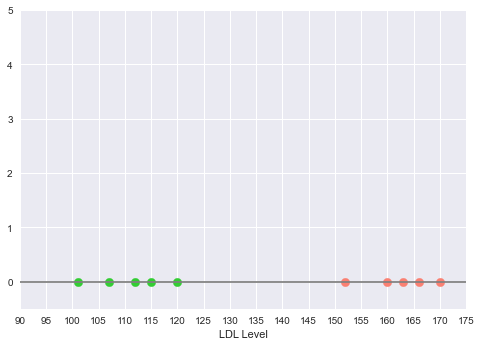

In [4]:
one_d_ldl()

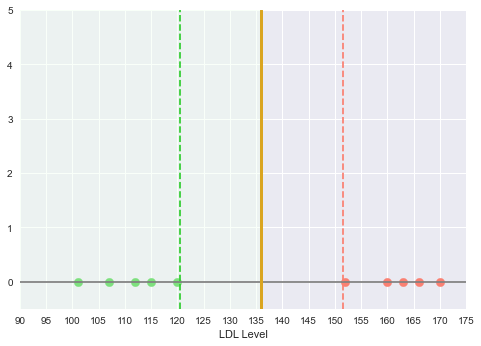

In [5]:
one_d_ldl('acd')

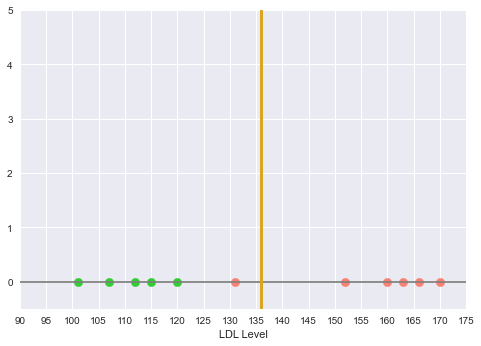

In [6]:
one_d_ldl('bc')

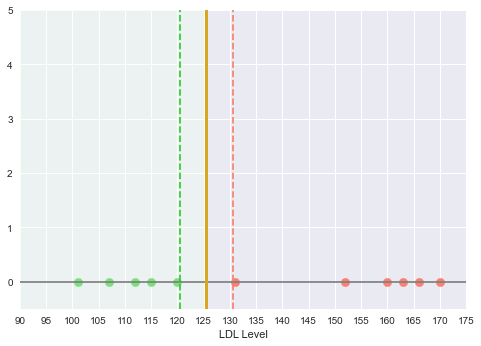

In [7]:
one_d_ldl('be')

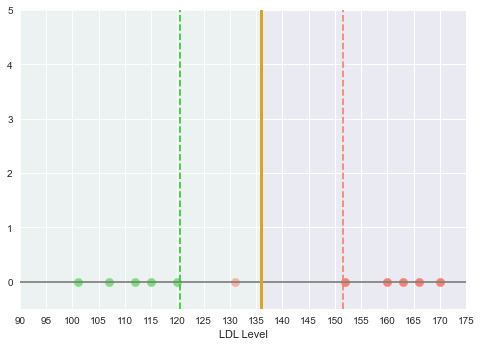

In [8]:
one_d_ldl('abcd')

#### Python Method to Plot LDL and TG (Triglyceride) Levels in Two-Dimensional Space

A sample LDL and TG levels plot method that illustrates the data points and the SVM related threshold and margins

In [9]:
def two_d_ldl_tg(s=''):
    x_ldl_g = np.array([101, 107, 112, 115, 120])
    y_ldl_g = np.array([92, 113, 121, 102, 117])
    x_ldl_b = np.array([152, 160, 163, 166, 170])
    y_ldl_b = np.array([212, 193, 201, 245, 197])
    plt.xlabel('LDL Level')
    plt.ylabel('TG Level')
    plt.xticks(np.arange(90, 180, 5))
    plt.yticks(np.arange(90, 300, 10))
    plt.xlim(95, 175)
    plt.ylim(80, 260)
    plt.axhline(80, color='gray')
    plt.scatter(x_ldl_g, y_ldl_g, color='limegreen', s=72)
    plt.scatter(x_ldl_b, y_ldl_b, color='salmon', s=72)
    # Plot the SVM Margins - green for good and red for bad
    if s.find('a') >= 0:
        plt.plot([132.5, 95], [80, 200], linestyle='--', color='limegreen')
        plt.plot([175, 137], [130, 260], linestyle='--', color='salmon')
    # Plot the outlier LDL level
    if s.find('b') >= 0:
        plt.scatter([131], [169], color='salmon', s=72)
    # Plot the SVM Threshold
    if s.find('c') >= 0:
        plt.plot([162, 107], [80, 260], linewidth=3, color='goldenrod')
    # Highlight the Region
    if s.find('d') >= 0:
        plt.fill_between([162, 107], [80, 260], color='honeydew', alpha=0.4)
        plt.fill_betweenx(np.arange(84.5, 260.5, 0.5), 95, 107, color='honeydew', alpha=0.4)
    # Plot the SVM Threshold and Margins with the outlier
    if s.find('e') >= 0:
        plt.plot([159, 105], [80, 260], linestyle='--', color='limegreen')
        plt.plot([175, 136], [135, 260], linestyle='--', color='salmon')
        plt.plot([174.5, 121], [85, 260], linewidth=3, color='goldenrod')
    plt.show()

### Plots to Illustrate SVM in Two-Dimension

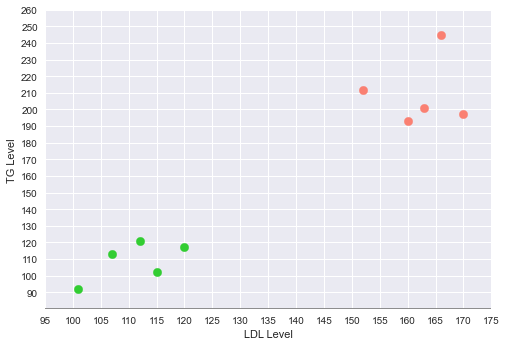

In [10]:
two_d_ldl_tg()

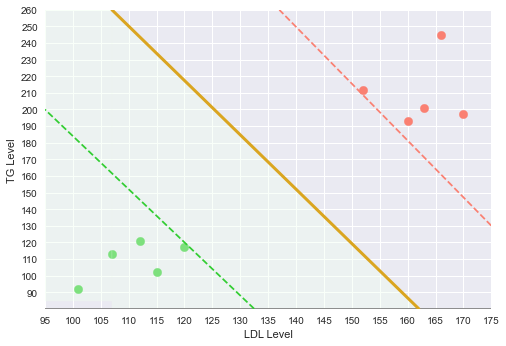

In [11]:
two_d_ldl_tg('acd')

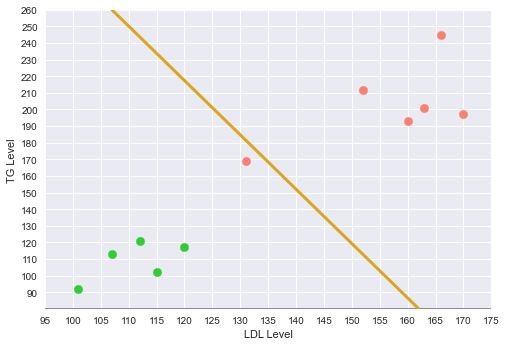

In [12]:
two_d_ldl_tg('bc')

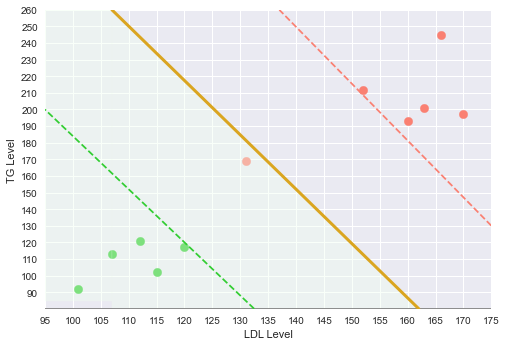

In [13]:
two_d_ldl_tg('abcd')

#### Python Method to Plot Number of Credit Cards in One-Dimensional Space

Having less than 3 or more than 6 cards is BAD and between 3 and 6 is GOOD

In [14]:
def one_d_cc():
    x_cc_g = np.array([4, 5, 6])
    y_cc_g = np.array([0, 0, 0])
    x_cc_b = np.array([1, 2, 7, 9])
    y_cc_b = np.array([0, 0, 0, 0])
    plt.xlabel('No of Credit Cards')
    plt.xticks(np.arange(-1, 10, 1))
    plt.xlim([-0.5, 10.0])
    plt.ylim([-0.5, 5.0])
    plt.axhline(0, color='gray')
    plt.scatter(x_cc_g, y_cc_g, color='limegreen', s=72)
    plt.scatter(x_cc_b, y_cc_b, color='salmon', s=72)
    plt.show()

#### No Clear Class Boundary

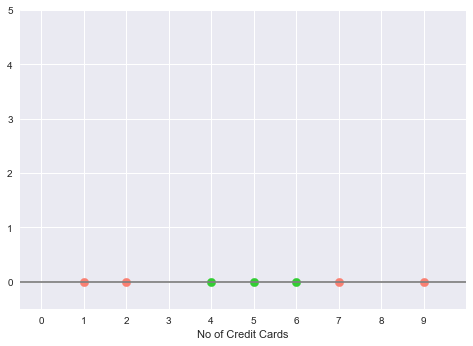

In [15]:
one_d_cc()

#### Python Method to Plot Number of Credit Cards vs Number of Credit Cards Squared in Two-Dimensional Space

Having less than 3 or more than 6 cards is BAD and between 3 and 6 is GOOD

In [16]:
def two_d_cc(s=''):
    x_cc_g = np.array([4, 5, 6])
    y_cc_g = np.array([x*x for x in x_cc_g])
    x_cc_b = np.array([1, 2, 8, 9])
    y_cc_b = np.array([x*x for x in x_cc_b])
    plt.xlabel('No of Credit Cards')
    plt.ylabel('No of Credit Cards (Squared)')
    plt.xticks(np.arange(-1, 10, 1))
    plt.xlim([-0.5, 10.0])
    plt.ylim([-0.5, 90.0])
    plt.axhline(0, color='gray')
    plt.scatter(x_cc_g, y_cc_g, color='limegreen', s=72)
    plt.scatter(x_cc_b, y_cc_b, color='salmon', s=72)
    if s.find('c') >= 0:
        plt.plot([2, 10], [0, 80], linewidth=2, color='goldenrod')
        plt.fill_between([2, 10], [0, 80], color='honeydew', alpha=0.4)
plt.show()

#### Clear SVM Classification

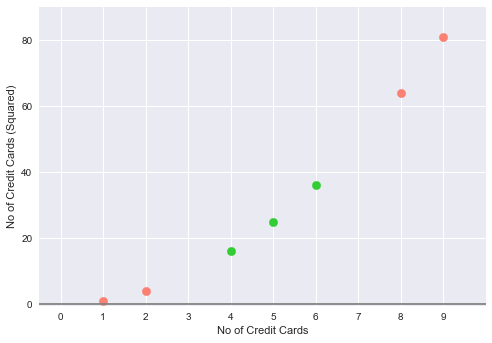

In [17]:
two_d_cc()

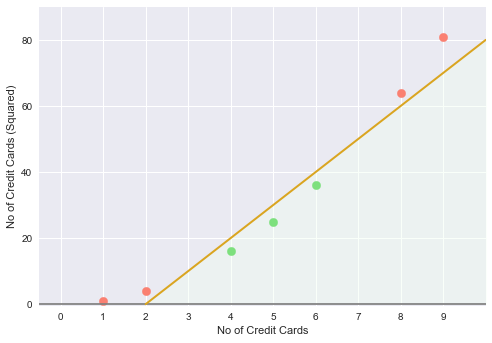

In [18]:
two_d_cc('c')

## Hands-on Demo using Scikit-Learn

#### Load the Heart Failure Data Set
Source: [UCI Machine Learning Repository - Heart Failure Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

**Data Set Information:**

The dataset contains the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

**Feature Information:**

Thirteen (13) clinical features:

- `age`: age of the patient (years)
- `anaemia`: decrease of red blood cells or hemoglobin (boolean)
- `high blood pressure`: if the patient has hypertension (boolean)
- `creatinine phosphokinase (CPK)`: level of the CPK enzyme in the blood (mcg/L)
- `diabetes`: if the patient has diabetes (boolean)
- `ejection fraction`: percentage of blood leaving the heart at each contraction (percentage)
- `platelets`: platelets in the blood (kiloplatelets/mL)
- `sex`: woman or man (binary)
- `serum creatinine`: level of serum creatinine in the blood (mg/dL)
- `serum sodium`: level of serum sodium in the blood (mEq/L)
- `smoking`: if the patient smokes or not (boolean)
- `time`: follow-up period (days)
- `death event`: if the patient deceased during the follow-up period (boolean)

In [19]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'
heart_failure_df = pd.read_csv(url)
heart_failure_df.rename(columns={'DEATH_EVENT': 'death_event', 'creatinine_phosphokinase': 'cpk_enzyme', 'high_blood_pressure': 'high_bp'}, inplace=True)
heart_failure_df

,age,anaemia,cpk_enzyme,diabetes,ejection_fraction,high_bp,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### Create the training and test data sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(heart_failure_df, heart_failure_df['death_event'], test_size=0.25, random_state=101)
X_train = X_train.drop('death_event', axis=1)
X_test = X_test.drop('death_event', axis=1)

#### Scale the training and test data set

In [21]:
scaler = StandardScaler()
s_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
s_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

#### Initialize and fit the SVM Classifier model

The hyperparameter `C` is a regularization parameter that is inversely proportional to the number of misclassifications to allow. The lowe r the value, the more the misclassifications. The higher the value, the lower the misclassifications
The hyperparameter `kernel` is the SVM kernel transformation - it can be `linear`, `poly`, or `rbf`

In [22]:
model = SVC(kernel='linear', C=100, random_state=101)
model.fit(s_X_train, y_train)

SVC(C=100, kernel='linear', random_state=101)

#### Predict the target `death_event` using the test data set

In [23]:
y_predict = model.predict(s_X_test)

#### Display the accuracy score

In [24]:
accuracy_score(y_test, y_predict)

0.8533333333333334